In [1]:
# Plot Rollout Metrics for PPO Training
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
csv_path = "rollout_test_1.csv"  # Update path if needed
df = pd.read_csv(csv_path)

# Check the first few rows to confirm structure
df.head()


,timesteps,learning_rate,entropy_loss,approx_kl,loss,policy_gradient_loss,clip_fraction,value_loss,explained_variance,std,n_updates,clip_range,ep_len_mean,ep_rew_mean
0,2048,0.000299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.2,69.586207,-46.901226
1,4096,0.000298,-2.837484,0.006960,18.069735,-0.006164,0.057861,62.354235,0.001710,0.999105,10,0.2,70.517241,-48.458937
2,6144,0.000297,-2.839632,0.011056,27.801905,-0.007261,0.067334,72.186694,0.071033,1.003429,20,0.2,66.285714,-42.204270
3,8192,0.000296,-2.844169,0.011379,29.853338,-0.013522,0.126660,62.419254,0.050003,1.004178,30,0.2,62.503817,-38.103705
4,10240,0.000294,-2.854825,0.008941,50.701523,-0.017562,0.143018,87.770163,0.055618,1.007978,40,0.2,58.320000,-32.111172


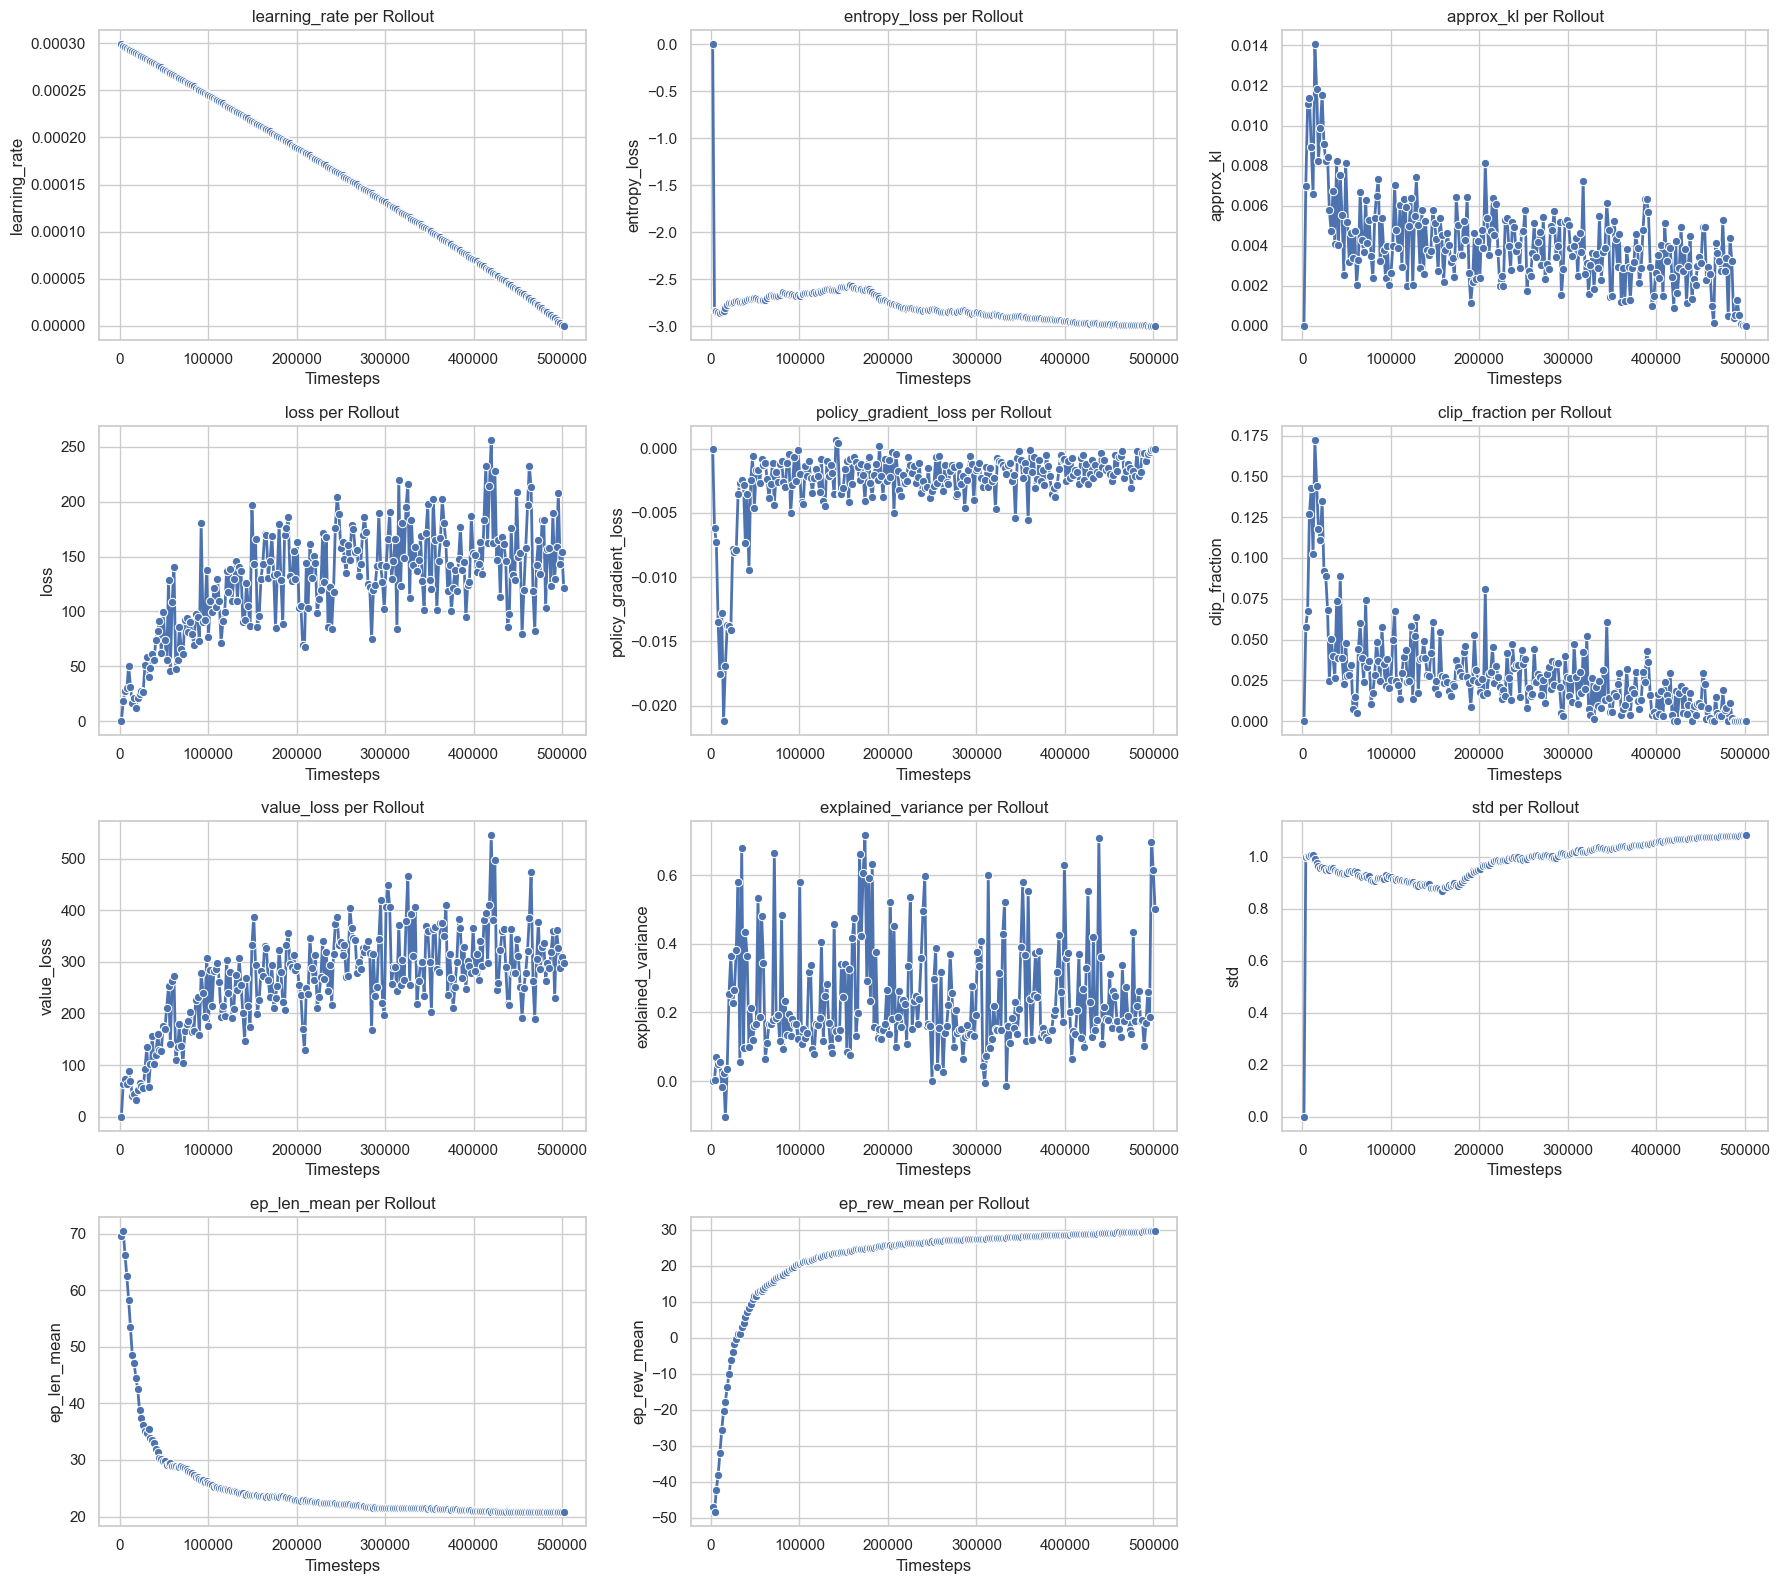

In [2]:
# Set plotting style
sns.set(style="whitegrid", context="notebook")

# Metrics to plot per rollout
metrics = [
    "learning_rate",
    "entropy_loss",
    "approx_kl",
    "loss",
    "policy_gradient_loss",
    "clip_fraction",
    "value_loss",
    "explained_variance",
    "std",
    "ep_len_mean",
    "ep_rew_mean"
]

# Create subplots for each metric
n_cols = 3
n_rows = (len(metrics) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Plot each metric
for idx, metric in enumerate(metrics):
    sns.lineplot(ax=axes[idx], x="timesteps", y=metric, data=df, marker="o", linewidth=2)
    axes[idx].set_title(f"{metric} per Rollout", fontsize=12)
    axes[idx].set_xlabel("Timesteps")
    axes[idx].set_ylabel(metric)
    axes[idx].grid(True)

# Hide any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
